# LANE DETECTION USING HOUGH TRANSFORMATION

### importing modules and the image

In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(540, 960, 3)


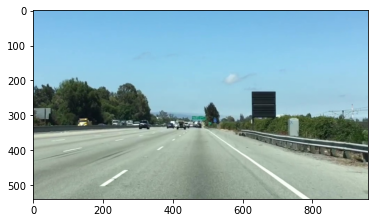

In [141]:
image = cv2.imread("image_lane.jpg")
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### converting the image to gray scale

(540, 960)


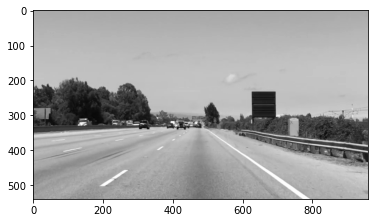

In [142]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image_gray.shape)

plt.imshow(image_gray, cmap="gray")

### applying gaussian blur

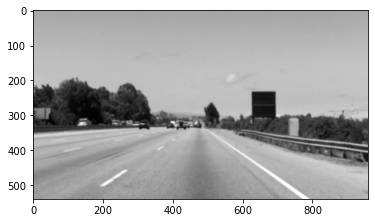

In [196]:
image_blurred = cv2.GaussianBlur(image_gray, (7,7), 0)
plt.imshow(image_blurred, cmap="gray")

### applying canny edge detection

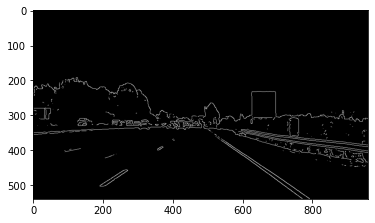

In [226]:
low = 100
high = 100
image_canny = cv2.Canny(image_blurred, low, high)
plt.imshow(image_canny, cmap="gray")

### define a region of interest

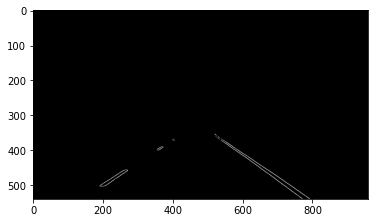

In [227]:
vertices = np.array([[(110,550),(400, 350), (530, 350), (820,550)]])
mask = np.zeros_like(image_gray)
cv2.fillPoly(mask, vertices, 255)
masked_image = cv2.bitwise_and(image_canny, mask)
plt.imshow(masked_image, cmap="gray")

## Hough Transformation

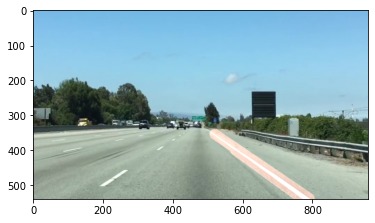

In [228]:
rho = 1            # distance resolution in pixels 
theta = np.pi/180  # angular resolution in radians 
threshold = 200 # minimum number of votes
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength=100, maxLineGap=50)

# Create an empty black image
line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:      
        cv2.line(line_image, (x1, y1), (x2, y2), [100, 100, 255], 30)

# Resultant weighted image is calculated as follows: original_img * α + img * β + γ
image_with_lines = cv2.addWeighted(image, 1, line_image, 0.3, 0)

plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))